# Group 25 Project: Investigating Volatile Acidity of Wine in Regards to Quality Rating

In [3]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
wine_quality <- read.csv('winequality-red.csv', sep = ";") |>
    select(total.sulfur.dioxide, quality) |>
    group_by(quality) |>
    summarize(mean = mean(total.sulfur.dioxide))
wine_quality

quality,mean
<int>,<dbl>
3,24.90000
4,36.24528
5,56.51395
6,40.86991
7,35.02010
8,33.44444


The dataset used in this project contains information related to the Portuguese “Vinho Verde” red wine, inlcuding volatile acidity and quality rating, which we are interested in investigating, among many other physiochemical traits. The wine is expert rated in a categorical variable from 1(very bad) to 10(very good).

Volatile acidity (g/dm³) is the measure of gaseous acids contained in wine. While naturally occuring as a product of wine fermentation, it can result in displeasant tastes and odors as an indication of spoilage and poor hygene practices when present in excess.  According to the  Code of Federal Regulations, the maxmimum amount of acceptable Volatile Acidity is 1.4 g/dm³. (Gardner, 2020). A statistical analysis by Jose, n.d. concludes a strong correlation and a decreasing trend between volatile acidity and quality. This begs the question: Is there a significant difference in volatile acidity across different quality ratings of wine? 

We will conduct a multiple hypothesis test of ratings 5, 6, and 7 by calculating the mean and standard deviation of volatile acidity. As volatile acidity is a numeric variable, we can use mean as a point estimate because all the observations contribute equally. Since there are limited samples, we will use bootstraping to create resamples that will help estimate the sampling distribution. Moreover, standard deviation can help construct a confident interval, which approximates a possible range for the population parameter. We choose a standard 5% signficance level to account for the subjective nature of wine rating. Our null hypothesis is that there is no significant difference of volatile acidity, while the alternative hypothesis is that at least one out of the three ratings that significantly differs in level.



In [5]:
data <- read.csv('winequality-red.csv', sep = ";")

head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


The dataframe is already in tidy format.

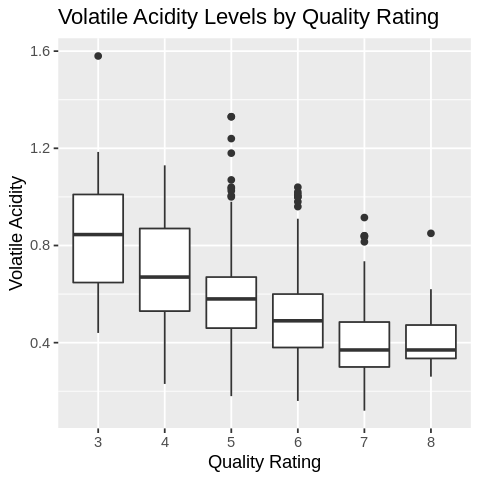

In [17]:
ggplot(data, aes(x = factor(quality), y = volatile.acidity)) +
  geom_boxplot() +
  labs(x = "Quality Rating", y = "Volatile Acidity") +
  ggtitle("Volatile Acidity Levels by Quality Rating")

options(repr.plot.width = 2, repr.plot.height = 3)

We see that the mean volatile acidity show a decreasing trend as quality rating increases, in alignment to research. Also note the symmetry in the whiskers and a couple outliers.

In [20]:
parameter_estimates <- data %>%
  group_by(quality) %>%
  summarise(mean_volatile_acidity = mean(volatile.acidity))
head(parameter_estimates)

quality,mean_volatile_acidity
<int>,<dbl>
3,0.8845000
4,0.6939623
5,0.5770411
6,0.4974843
7,0.4039196
8,0.4233333


In [49]:
data_count <- data |>
group_by(quality) |>
count()

data_count

quality,n
<int>,<int>
3,10
4,53
5,681
6,638
7,199
8,18


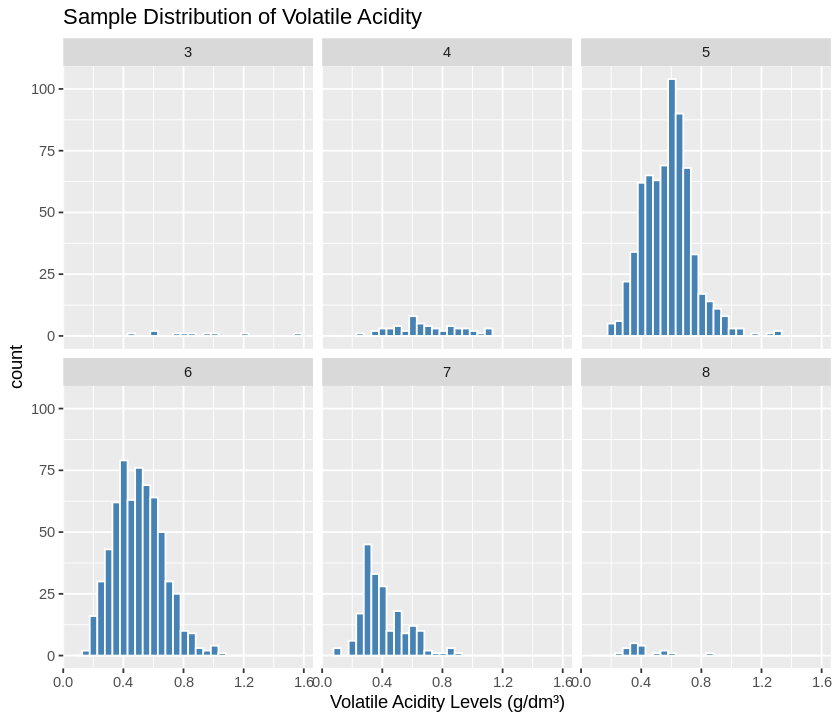

In [44]:
ggplot(data, aes(x = volatile.acidity)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
facet_wrap(~ quality) +
  xlab("Volatile Acidity Levels (g/dm³)") +
  ggtitle("Sample Distribution of Volatile Acidity")
     
options(repr.plot.width = 7, repr.plot.height =6)

We see that there is an imbalance of observations between the ratings which could impact the hypothesis testings, so we chose to compare ratings 5, 6 and 7 with similar number of observations. Also note that the spread is similar between the ratings 5, 6, and 7, and that all of the data points aside from one stayed within the threshold of 1.4 g/dm^3.

# Methods:Plan
Our dataset is reliable and comes from an authoritative resource, which is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. Meanwhile, there is no missing data so we can assume that it is a good representative of the whole population. Even though we do not know if data was sample randomly and independently, we can use bootstrap sampling so that our results(point estimate, confidence interval, etc.) can somewhat reflect the population. We will use multiple hypothesis tests of three ratings each with 5% signficance level to gain a more comprehensive insight towards the relationship of quality vs. volatile acidity. We will also construct confidence intervals so our analysis is objective and scientific. We also chose to conduct hypothesis testing with quality ratings with a large amount of observations to maximize precision, limit sampling variability, and ultimately provide a more accurate representation of the population and meaningful results.
</br>
</br>
Our goal is to make inferences about the true population using the sample. The plot above shows a decreasing trend of volatile acidity with increasing quality. However, this information alone is not sufficient to tell if this difference is "significant" enough to draw a conclusion, or if this trend only occurs in this specific sample. To reduce the influence of randomness, we use bootstrapping to approximate the true mean and standard error, then construct a confidence interval and perform hypothesis tests to extrapolate conclusions based on rigorous analysis.
<br>
</br>
Through multiple hypothesis testing (comparing three different quality groups, two at a time) and constructing confidence intervals, we expect to find out if there is a significant difference in volatile acidity between different ratings of wine. Our findings can provide helpful and informative insight to wine buyers and debunk or confirm popular beliefs. In the future, we can build a predictive model to predict quality rating and utilize our findings in this study to decide if volatile acidity is a significant predictor or not. 
</br>
</br>
In our case of studying the relationship between volatile acidity and wine rating, Type I error is more serious because it could lead to unnecessary changes in wine production processes, while a Type II error might simply result in missed opportunities to improving wine quality.

# references

dataset:
https://archive.ics.uci.edu/dataset/186/wine+quality

Gardner, D. (2020, June 16). Volatile acidity in wine. Penn State Extension. https://extension.psu.edu/volatile-acidity-in-wine

Mazzeo, J. (2021, November 9). What does “volatile acidity” mean in wine? Wine Enthusiast. https://www.wineenthusiast.com/basics/drinks-terms-defined/volatile-acidity-wine/

Jose, B. (n.d.). Exploratory data analysis on red wine - github pages. Exploratory Data Analysis on Red Wine. https://bibinmjose.github.io/RedWineDataAnalysis/ 


In [3]:
wine_data <- read.csv('winequality-red.csv', sep = ";")
anova_result <- aov( quality ~ volatile.acidity, data = wine_data)
summary(anova_result)

                   Df Sum Sq Mean Sq F value Pr(>F)    
volatile.acidity    1  159.0  158.97   287.4 <2e-16 ***
Residuals        1597  883.2    0.55                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 1.Df (Degrees of Freedom):

volatile.acidity: This has 1 degree of freedom because it's a continuous variable, and for continuous predictors, the degrees of freedom is always 1 in a simple linear regression model.
Residuals: The residual degrees of freedom is 1597. This represents the remaining variability after accounting for the effect of volatile.acidity.

## 2.Sum Sq (Sum of Squares):

volatile.acidity: The variation in quality that can be explained by volatile.acidity is 159.0.
Residuals: The variation in quality that cannot be explained by volatile.acidity and is due to other factors or errors is 883.2.

## 3.Mean Sq (Mean Squares):

volatile.acidity: This is the explained variance (159.0) divided by its degrees of freedom (1), which equals 158.97.
Residuals: This is the unexplained variance (883.2) divided by its degrees of freedom (1597), which equals 0.55.

## 4.F-value:

The computed F-value is 287.4. It indicates the ratio of the explained variance to unexplained variance. A high F-value suggests that volatile.acidity is a significant predictor of quality.

## 5.Pr(>F):

The p-value associated with the F-statistic is less than 2e-16 (essentially 0), which is much less than 0.05 (the common alpha level). This means the result is statistically significant at the 0.05 level (or even at much stricter levels like 0.01 or 0.001).

## 6.Signif. codes:

The asterisks indicate the level of significance. Three asterisks denote a very significant p-value (p < 0.001).

## Conclusion:

The ANOVA test indicates a significant difference in volatile acidity across the different quality ratings of wine. Given the extremely low p-value and the extremely high f-value, you can reject the null hypothesis (that all group means are equal). There is strong evidence to suggest that at least two quality ratings have different mean volatile acidities.